# **Importing the libraries**



In [1]:
import urllib.request
from bs4 import BeautifulSoup
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Webscraping - site 1 (Brazil Capitals)**




In [2]:
#acessing the site, starting the recourse of the request and bs4
brazil_capitals = "https://pt.wikipedia.org/wiki/Lista_de_capitais_do_Brasil"
page = urllib.request.urlopen(brazil_capitals)
soup = BeautifulSoup(page, 'html.parser')

In [3]:
#seeing the site in HTML
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
 <head>
  <meta charset="utf-8"/>
  <title>
   Lista de capitais do Brasil – Wikipédia, a enciclopédia livre
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"1bead091-0284-4fe5-8d8f-50ee7ea0249e","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Lista_de_capitais_do_Brasil","wgTitle":"Lista de capitais do Brasil","wgCurRevisionId":62744460,"wgRevisionId":62744460,"wgArticleId":601211,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Artigos com ligações externas inativas","!Artigos com citações q

In [4]:
#locating the specific data
item = soup.find('li', attrs={'class': 'toclevel-2 tocsection-26'})
item

<li class="toclevel-2 tocsection-26"><a href="#Rio_de_Janeiro"><span class="tocnumber">2.21</span> <span class="toctext">Rio de Janeiro</span></a></li>

In [5]:
#converting HTML into String
print(item.text.strip())

2.21 Rio de Janeiro


In [6]:
#locating the specific data and converting it into String
list_capitals = soup.find('li', attrs={'class': 'toclevel-1 tocsection-5'})
list_capitals_txt = list_capitals.text.strip()
print(list_capitals_txt)

2 Capitais estaduais

2.1 Acre
2.2 Alagoas
2.3 Amapá
2.4 Amazonas
2.5 Bahia
2.6 Ceará
2.7 Distrito Federal
2.8 Espírito Santo
2.9 Goiás
2.10 Maranhão
2.11 Mato Grosso
2.12 Mato Grosso do Sul
2.13 Minas Gerais
2.14 Pará
2.15 Paraíba
2.16 Paraná
2.17 Pernambuco
2.18 Piauí
2.19 Rio Grande do Norte
2.20 Rio Grande do Sul
2.21 Rio de Janeiro
2.22 Rondônia
2.23 Roraima
2.24 Santa Catarina
2.25 São Paulo
2.26 Sergipe
2.27 Tocantins


In [7]:
#getting all links in the site
all_links = soup.find_all("a")
for link in all_links:
  print(link.get("href"))

#content
/wiki/Wikip%C3%A9dia:P%C3%A1gina_principal
/wiki/Especial:Pesquisar
/w/index.php?title=Especial:Criar_conta&returnto=Lista+de+capitais+do+Brasil
/w/index.php?title=Especial:Criar_conta&returnto=Lista+de+capitais+do+Brasil
/w/index.php?title=Especial:Entrar&returnto=Lista+de+capitais+do+Brasil
/wiki/Wikip%C3%A9dia:Boas-vindas
/wiki/Especial:Minha_discuss%C3%A3o
/wiki/Especial:Minhas_contribui%C3%A7%C3%B5es
/wiki/Lista_de_capitais_do_Brasil
/w/index.php?title=Discuss%C3%A3o:Lista_de_capitais_do_Brasil&action=edit&redlink=1
/wiki/Lista_de_capitais_do_Brasil
/w/index.php?title=Lista_de_capitais_do_Brasil&veaction=edit
/w/index.php?title=Lista_de_capitais_do_Brasil&action=edit
/w/index.php?title=Lista_de_capitais_do_Brasil&action=history
/wiki/Wikip%C3%A9dia:P%C3%A1gina_principal
/wiki/Portal:Conte%C3%BAdo_destacado
/wiki/Portal:Eventos_atuais
/wiki/Wikip%C3%A9dia:Esplanada
/wiki/Especial:Aleat%C3%B3ria
/wiki/Portal:%C3%8Dndice
/wiki/Wikip%C3%A9dia:Informe_um_erro
/wiki/Wikip%C3%A9

In [8]:
#getting the data which has HTML tag a
print(soup.find_all("a"))
#print(soup.a)

[<a class="mw-jump-link" href="#content">Saltar para o conteúdo</a>, <a class="mw-logo" href="/wiki/Wikip%C3%A9dia:P%C3%A1gina_principal">
<img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/mobile/copyright/wikipedia.png" width="50"/>
<span class="mw-logo-container">
<img alt="Wikipédia" class="mw-logo-wordmark" src="/static/images/mobile/copyright/wikipedia-wordmark-fr.svg" style="width: 7.4375em; height: 1.125em;"/>
<img alt="" class="mw-logo-tagline" height="13" src="/static/images/mobile/copyright/wikipedia-tagline-pt.svg" style="width: 7.0625em; height: 0.8125em;" width="113"/>
</span>
</a>, <a class="mw-ui-button mw-ui-quiet mw-ui-icon mw-ui-icon-element mw-ui-icon-wikimedia-search search-toggle" href="/wiki/Especial:Pesquisar">
<span>Busca</span>
</a>, <a class="mw-ui-button mw-ui-quiet" href="/w/index.php?title=Especial:Criar_conta&amp;returnto=Lista+de+capitais+do+Brasil" title="É encorajado a criar uma conta e iniciar sessão; no entanto, não é

## **Webscraping - site 2 (Brazil Capitals per Area)**

In [9]:
#acessing the site, starting the recourse of the request and bs4
brazil_capitals_area = 'https://pt.wikipedia.org/wiki/Lista_de_capitais_do_Brasil_por_%C3%A1rea'
o_page = urllib.request.urlopen(brazil_capitals_area)
o_soup = BeautifulSoup(o_page, 'html.parser')

In [10]:
#finding "table" in the HTML code
all_table = o_soup.find_all('table')
table = o_soup.find('table', attrs={"class": "wikitable sortable"})

In [11]:
print(all_table)
#print(table)

[<table class="wikitable sortable">
<tbody><tr style="background:#ececec;">
<th>Posição
</th>
<th>Sede de governo
</th>
<th>Código do IBGE
</th>
<th>Unidade federativa
</th>
<th>Área (km²)
</th></tr>
<tr>
<td align="center">1</td>
<td><a href="/wiki/Porto_Velho" title="Porto Velho">Porto Velho</a></td>
<td align="center">1100205</td>
<td><img alt="" class="thumbborder" data-file-height="1400" data-file-width="2000" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Bandeira_de_Rond%C3%B4nia.svg/20px-Bandeira_de_Rond%C3%B4nia.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Bandeira_de_Rond%C3%B4nia.svg/30px-Bandeira_de_Rond%C3%B4nia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Bandeira_de_Rond%C3%B4nia.svg/40px-Bandeira_de_Rond%C3%B4nia.svg.png 2x" width="20"/> <a href="/wiki/Rond%C3%B4nia" title="Rondônia">Rondônia</a></td>
<td align="right">34 090,952
</td></tr>
<tr>
<td align="center">2</td>
<td><a href="/wi

## **Creating the dataframe**

In [12]:
#generating a list of the columns
A=[]
B=[]
C=[]
D=[]
E=[]

for row in table.findAll("tr"): #rows
    cells = row.findAll('td') #columns
    if len(cells)==5: #columns number
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find('a').text) #find "a" because in this column there is an image link.
        E.append(cells[4].find(text=True))

In [13]:
#preparing the columns
df = pd.DataFrame(index=A, columns=['Position'])

df['Position']=A
df['Capital']=B
df['Code_IBGE']=C
df['State']=D
df['Area']=E

df

,Position,Capital,Code_IBGE,State,Area
1,1,Porto Velho,1100205,Rondônia,"34 090,952\n"
2,2,Manaus,1302603,Amazonas,"11 401,092\n"
3,3,Rio Branco,1200401,Acre,"8 834,942\n"
4,4,Campo Grande,5002704,Mato Grosso do Sul,"8 082,978\n"
5,5,Macapá,1600303,Amapá,"6 563,849\n"
6,6,Brasília,5300108,Distrito Federal,"5 760,783\n"
7,7,Boa Vista,1400100,Roraima,"5 687,037\n"
8,8,Cuiabá,5103403,Mato Grosso,"3 266,538\n"
9,9,Palmas,1721000,Tocantins,"2 227,444\n"
10,10,São Paulo,3550308,São Paulo,"1 521,110\n"


## **Data cleaning and transformation**

In [14]:
#noticing some missing data - State Pará
df.iloc[12,3] 

''

In [15]:
#noticing some missing data - State Bahia
df.iloc[14,3] 

''

In [16]:
#noticing the way which the data of the rows (from 1 to 13) are formatted
df.iloc[0,4] #\xa0

'34\xa0090,952\n'

In [17]:
#cleaning and transforming data
df['Area'] = df['Area'].apply(lambda x: x.replace('\n',''))
df['Area'] = df['Area'].apply(lambda x: x.replace(',','.'))
df['Area'] = df['Area'].apply(lambda x: x.replace('\xa0',''))
df.loc[df.Capital=='Belém','State']='Pará'
df.loc[df.Capital=='Salvador','State']='Bahia'

In [18]:
#checking the changes
df

,Position,Capital,Code_IBGE,State,Area
1,1,Porto Velho,1100205,Rondônia,34090.952
2,2,Manaus,1302603,Amazonas,11401.092
3,3,Rio Branco,1200401,Acre,8834.942
4,4,Campo Grande,5002704,Mato Grosso do Sul,8082.978
5,5,Macapá,1600303,Amapá,6563.849
6,6,Brasília,5300108,Distrito Federal,5760.783
7,7,Boa Vista,1400100,Roraima,5687.037
8,8,Cuiabá,5103403,Mato Grosso,3266.538
9,9,Palmas,1721000,Tocantins,2227.444
10,10,São Paulo,3550308,São Paulo,1521.110


In [19]:
#taking a look in the columns type
df.dtypes

Position     object
Capital      object
Code_IBGE    object
State        object
Area         object
dtype: object

In [20]:
#converting from object to int and float
df['Area'] = pd.to_numeric(df['Area'],errors='coerce')
df['Code_IBGE'] = df['Code_IBGE'].astype(int)

In [21]:
#check the columns type out 
df.dtypes

Position      object
Capital       object
Code_IBGE      int64
State         object
Area         float64
dtype: object

In [22]:
df.to_csv("brazil_capitals_area.csv", encoding='cp1252')
files.download('brazil_capitals_area.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Statistics** 

In [23]:
#calculating the mean, median and std
mean = df['Area'].mean()
median = df['Area'].median()
std = df['Area'].std()

In [24]:
mean

3582.465222222222

In [25]:
median

728.841

In [26]:
std

6858.395647478314

In [27]:
print("The mean, median and standard deviation of the area of Brazilian states are: %f, %f, %f" % (mean, median, std))

The mean, median and standard deviation of the area of Brazilian states are: 3582.465222, 728.841000, 6858.395647


## **Visualizing and analyzing data**

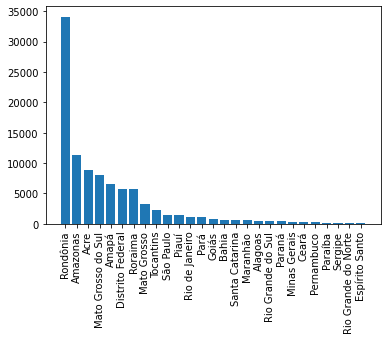

In [28]:
#relation between State and Area
plt.bar(df['State'],df['Area'])
plt.xticks(rotation=90)
plt.show()

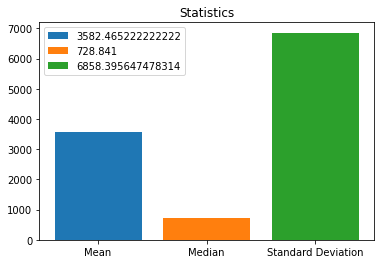

In [29]:
#relation between mean, median and standard deviation
plt.bar('Mean',mean, label = mean)
plt.bar('Median',median, label = median)
plt.bar('Standard Deviation',std, label = std)
plt.title("Statistics")
plt.legend()
plt.show()